In [110]:
import pandas as pd

#checking for missing values
#resulted in no missing values
df = pd.read_csv('winequality-white.csv')
df.isnull().sum().sort_values(ascending=False).head()

fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
chlorides           0
dtype: int64

In [111]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [112]:
#splitting dependent variable
y = df['quality']
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [113]:
# splits table into X-Y components of model, axis = 1 calculates in column mode 
x = df.drop('quality', axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [114]:
#Part 2 - Clustering

#Hierarchical clustering
import matplotlib.pyplot as plt

%matplotlib inline

In [115]:
#Normalize Data

from sklearn.preprocessing import normalize

data_normalized = normalize(x)

data_normalized = pd.DataFrame(data_normalized,columns=x.columns)

data_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.039447,0.001522,0.002029,0.116649,0.000254,0.253585,0.957988,0.005641,0.016906,0.002536,0.049590
1,0.047267,0.002251,0.002551,0.012004,0.000368,0.105038,0.990361,0.007458,0.024759,0.003676,0.071276
2,0.078912,0.002728,0.003897,0.067221,0.000487,0.292266,0.944992,0.009694,0.031760,0.004287,0.098396
3,0.037412,0.001195,0.001663,0.044166,0.000301,0.244214,0.966464,0.005173,0.016575,0.002078,0.051441
4,0.037412,0.001195,0.001663,0.044166,0.000301,0.244214,0.966464,0.005173,0.016575,0.002078,0.051441


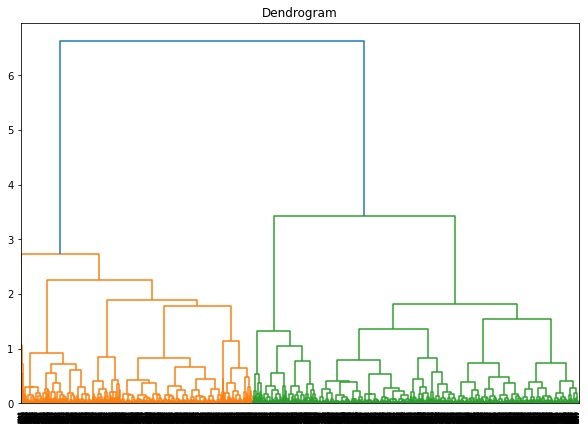

In [116]:
#Dendrogram

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))

plt.title("Dendrogram")

dend = sch.dendrogram(sch.linkage(data_normalized, method='ward'))

In [117]:
#Part 3 - Regression - Supervised Learning 

#Setting test and train splits

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 7038)

In [118]:
# 80% of data is used for training set; 4898 --> 3918
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1646,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1
4206,5.9,0.32,0.20,14.4,0.050,29.0,144.0,0.99666,3.24,0.41,10.3
842,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8
471,6.5,0.38,0.34,3.4,0.036,34.0,200.0,0.99370,3.14,0.76,10.0
2463,7.0,0.26,0.26,10.8,0.039,37.0,184.0,0.99787,3.47,0.58,10.3
...,...,...,...,...,...,...,...,...,...,...,...
4108,6.7,0.28,0.42,3.5,0.035,43.0,105.0,0.99021,3.18,0.38,12.2
2885,6.9,0.40,0.30,10.6,0.033,24.0,87.0,0.99265,3.15,0.45,12.8
3979,6.5,0.29,0.52,1.7,0.034,41.0,193.0,0.99223,3.25,0.59,10.4
3157,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0


In [119]:
#Linear Regression
#Training the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [120]:
#test
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [121]:
y_lr_train_pred

array([5.96143663, 5.90686496, 5.39380411, ..., 5.83844275, 6.29611954,
       6.4933555 ])

In [122]:
y_lr_test_pred

array([5.58806786, 5.33102291, 5.84718152, 6.17756353, 6.10578894,
       5.72424657, 5.81338456, 5.66647706, 5.24804887, 6.27729011,
       6.46441941, 6.10626478, 6.80275015, 6.01472097, 6.18253284,
       5.12063812, 5.98123353, 5.50226467, 5.66151747, 6.2808985 ,
       5.619238  , 5.06927603, 6.43153849, 6.25818657, 6.25618595,
       5.30192453, 5.76307245, 6.82221193, 6.44841937, 5.9676183 ,
       6.0918813 , 5.77934586, 6.21998344, 5.64609633, 5.89311119,
       5.94034026, 6.16171807, 5.98320615, 5.01050239, 5.25515992,
       6.10197044, 5.82355108, 5.58384793, 5.12699737, 5.30115903,
       5.58561896, 5.79713702, 5.44197895, 7.19216581, 5.307637  ,
       5.34054094, 5.99765652, 6.59888198, 5.63749029, 6.7715085 ,
       5.55321739, 6.5608107 , 6.0367116 , 6.19187036, 5.83154327,
       5.20651486, 6.29120839, 5.62133484, 6.57683238, 5.3039848 ,
       5.40721726, 5.75140975, 5.50945077, 6.45487674, 6.11516681,
       5.60095901, 6.15728904, 5.91822612, 6.39389687, 6.23303

In [123]:
y_train

1646    6
4206    6
842     7
471     5
2463    7
       ..
4108    6
2885    6
3979    6
3157    7
2566    7
Name: quality, Length: 3918, dtype: int64

In [124]:
y_lr_train_pred

array([5.96143663, 5.90686496, 5.39380411, ..., 5.83844275, 6.29611954,
       6.4933555 ])

In [125]:
from sklearn.metrics import mean_squared_error, r2_score
import math

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_train_rmse = math.sqrt(mean_squared_error(y_train, y_lr_train_pred))

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_test_rmse = math.sqrt(mean_squared_error(y_test, y_lr_test_pred))

In [126]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR RMSE (Train):', lr_train_rmse)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)
print('LR RMSE (Test):', lr_test_rmse)

LR MSE (Train):  0.557346726343768
LR R2 (Train):  0.28859140679589645
LR RMSE (Train): 0.7465565794658621
LR MSE (Test):  0.5883263434894235
LR R2 (Test):  0.25231490069227835
LR RMSE (Test): 0.7670243434790212


In [127]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2, lr_train_rmse, lr_test_rmse]).transpose()
lr_results.columns = ['Method','Training MSE', 'Testing MSE','Training R2','Testing R2', 'Training RMSE', 'Testing RMSE']
lr_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2,Training RMSE,Testing RMSE
0,Linear Regression,0.557347,0.588326,0.288591,0.252315,0.746557,0.767024


In [128]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [129]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_train_rmse = math.sqrt(mean_squared_error(y_train, y_rf_train_pred))

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_test_rmse = math.sqrt(mean_squared_error(y_test, y_rf_test_pred))

In [131]:
rf_results = pd.DataFrame(['Random Forest Regression', rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2, rf_train_rmse, rf_test_rmse]).transpose()
rf_results.columns = ['Method','Training MSE', 'Testing MSE','Training R2','Testing R2', 'Training RMSE', 'Testing RMSE']
rf_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2,Training RMSE,Testing RMSE
0,Random Forest Regression,0.569284,0.591139,0.273354,0.24874,0.754509,0.768856


In [132]:
#K- Nearest Neighbor 
from sklearn.neighbors import KNeighborsRegressor

In [133]:
knn = KNeighborsRegressor(9)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [134]:
y_knn_train_pred = knn.predict(x_train)
y_knn_test_pred = knn.predict(x_test)

In [135]:
knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)
knn_train_rmse = math.sqrt(mean_squared_error(y_train, y_knn_train_pred))

knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)
knn_test_rmse = math.sqrt(mean_squared_error(y_test, y_knn_test_pred))

knn_results = pd.DataFrame(['K-Nearest Neighbors', knn_train_mse, knn_test_mse, knn_train_r2, knn_test_r2, knn_train_rmse, knn_test_rmse]).transpose()
knn_results.columns = ['Method','Training MSE', 'Testing MSE','Training R2','Testing R2', 'Training RMSE', 'Testing RMSE']
knn_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2,Training RMSE,Testing RMSE
0,K-Nearest Neighbors,0.519656,0.653364,0.336701,0.169661,0.720872,0.808309


In [136]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [137]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.1,random_state=3)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.1, random_state=3)

In [138]:
y_dt_train_pred = dt.predict(x_train)
y_dt_test_pred = dt.predict(x_test)

dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)
dt_train_rmse = math.sqrt(mean_squared_error(y_train, y_dt_train_pred))

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)
dt_test_rmse = math.sqrt(mean_squared_error(y_test, y_dt_test_pred))

dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_test_mse, dt_train_r2, dt_test_r2, dt_train_rmse, dt_test_rmse]).transpose()
dt_results.columns = ['Method','Training MSE', 'Testing MSE','Training R2','Testing R2', 'Training RMSE', 'Testing RMSE']
dt_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2,Training RMSE,Testing RMSE
0,Decision Tree,0.581846,0.612054,0.25732,0.22216,0.762788,0.782339


In [139]:
df_models = pd.concat([lr_results, rf_results, knn_results, dt_results], axis=0)
df_models

,Method,Training MSE,Testing MSE,Training R2,Testing R2,Training RMSE,Testing RMSE
0,Linear Regression,0.557347,0.588326,0.288591,0.252315,0.746557,0.767024
0,Random Forest Regression,0.569284,0.591139,0.273354,0.24874,0.754509,0.768856
0,K-Nearest Neighbors,0.519656,0.653364,0.336701,0.169661,0.720872,0.808309
0,Decision Tree,0.581846,0.612054,0.25732,0.22216,0.762788,0.782339


In [140]:
df_models.reset_index(drop=True)

,Method,Training MSE,Testing MSE,Training R2,Testing R2,Training RMSE,Testing RMSE
0,Linear Regression,0.557347,0.588326,0.288591,0.252315,0.746557,0.767024
1,Random Forest Regression,0.569284,0.591139,0.273354,0.24874,0.754509,0.768856
2,K-Nearest Neighbors,0.519656,0.653364,0.336701,0.169661,0.720872,0.808309
3,Decision Tree,0.581846,0.612054,0.25732,0.22216,0.762788,0.782339


Text(0.5, 0, 'Experimental Quality')

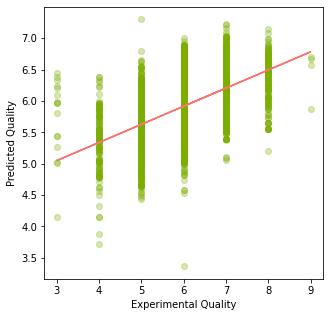

In [141]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Quality')
plt.xlabel('Experimental Quality')

In [142]:
#Part 4 - Classification

def quality_binary(row):
    if row['quality'] < 7:
        val = '0'
    else:
        val = '1'
    return val

#creating new column
df['Binary Quality'] = df.apply(quality_binary, axis=1)
 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Binary Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [143]:
# 3838 bad quality and 1060 good quality wines, imbalanced dataset
count = df['Binary Quality'].value_counts()
count

0    3838
1    1060
Name: Binary Quality, dtype: int64

<AxesSubplot:ylabel='Binary Quality'>

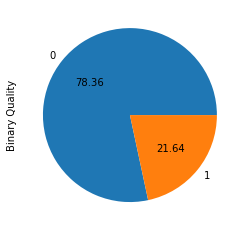

In [144]:
count.plot.pie(autopct='%.2f')

In [145]:
#Random Undersampling
import seaborn as sns

from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

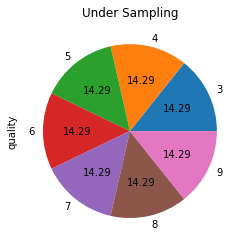

In [146]:
#Random UnderSampling 

rus = RandomUnderSampler(sampling_strategy="not minority")
x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Under Sampling")

In [147]:
#Logistic Regression

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [148]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

/Users/muhunthan.m/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [150]:
log_reg_results = pd.DataFrame(['Logistic Regression', log_reg.score(x_test,y_test), accuracy_score(y_test, y_pred)]).transpose()
log_reg_results.columns = ['Method','Score', 'Accuracy Score']
log_reg_results

,Method,Score,Accuracy Score
0,Logistic Regression,0.461224,0.461224


In [151]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  0,   0,   3,   1,   0,   0,   0],
       [  0,   0,  14,  20,   0,   0,   0],
       [  0,   1,  97, 199,   1,   0,   0],
       [  0,   1,  84, 351,   4,   0,   0],
       [  0,   0,  12, 151,   4,   0,   0],
       [  0,   0,   4,  28,   4,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        34
           5       0.45      0.33      0.38       298
           6       0.47      0.80      0.59       440
           7       0.31      0.02      0.04       167
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.46       980
   macro avg       0.18      0.16      0.14       980
weighted avg       0.40      0.46      0.39       980



/Users/muhunthan.m/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muhunthan.m/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/muhunthan.m/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
#Part 5 - Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [156]:
#extracting the 5 best features based on scores
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)

In [157]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [158]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores

,Specs,Score
0,fixed acidity,7.922042
1,volatile acidity,12.622636
2,citric acid,0.851118
3,residual sugar,501.235224
4,chlorides,2.529005
5,free sulfur dioxide,947.712845
6,total sulfur dioxide,3358.298433
7,density,0.005065
8,pH,0.428745
9,sulphates,0.579206


In [162]:
#Top 5 Features in Order:
print(featureScores.nlargest(5,'Score'))

                   Specs        Score
6   total sulfur dioxide  3358.298433
5    free sulfur dioxide   947.712845
3         residual sugar   501.235224
10               alcohol   155.078234
1       volatile acidity    12.622636


In [163]:
#Part 6 - Principal Component Analysis
from sklearn import preprocessing
from sklearn.decomposition import PCA
import random as rd

In [164]:
scaled_data = preprocessing.scale(x.T)

In [165]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

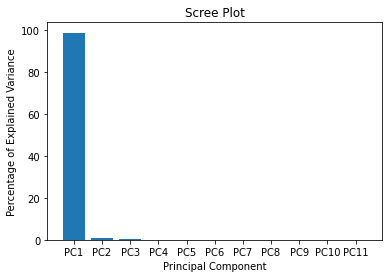

In [166]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'PC2 - 0.9%')

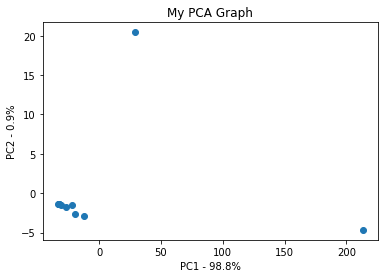

In [167]:
pca_df = pd.DataFrame(pca_data, index=[x,y], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [168]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_5_qualities = sorted_loading_scores[0:5].index.values

print(loading_scores[top_5_qualities])

1711    0.014377
1724    0.014377
1402    0.014377
213     0.014377
1242    0.014377
dtype: float64
